In [1]:
## We will import all the necessary libraries which will be used in our regression process.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
house_data=pd.read_csv("train.csv")

In [4]:
house_data.head() ## To get an idea about the data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data.info() ## To get an idea about the dtypes of various attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning

In [6]:
## We can check if any of the attributes have too much of null data- In our case we can have a filter of 10%.
## So we will remove those data which have more than 10% null values.
null_data=(house_data.isnull().sum()/house_data.isnull().count()*100).sort_values(ascending=False)

In [7]:
null_data.head(15)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [8]:
## So we can remove the first 5 columns from the data set as they have a null % of more than 10%.

In [9]:
house_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True,axis=1)

In [10]:
house_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
house_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
null_data=(house_data.isnull().sum()/house_data.isnull().count()*100).round(2).sort_values(ascending=False)
null_data.head(15)

GarageType      5.55
GarageCond      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
PavedDrive      0.00
WoodDeckSF      0.00
dtype: float64

In [13]:
house_data[['GarageYrBlt','MasVnrArea']].describe()

,GarageYrBlt,MasVnrArea
count,1379.000000,1452.000000
mean,1978.506164,103.685262
std,24.689725,181.066207
min,1900.000000,0.000000
25%,1961.000000,0.000000
50%,1980.000000,0.000000
75%,2002.000000,166.000000
max,2010.000000,1600.000000


In [14]:
## From the above:
## it is visible that a huge amount of outliers are present in MasVnrArea, so it would be better ro impute that column with its meadian.
## For GarageYrBlt we can manage with mean as there are no such outliers.

In [15]:
house_data['GarageYrBlt']=house_data.GarageYrBlt.fillna(house_data.GarageYrBlt.mean())

In [16]:
house_data['MasVnrArea']=house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())

In [17]:
null_data=(house_data.isnull().sum()/house_data.isnull().count()*100).round(2).sort_values(ascending=False)
null_data.head(15)

GarageType      5.55
GarageCond      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
Electrical      0.07
OpenPorchSF     0.00
WoodDeckSF      0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
dtype: float64

In [18]:
## It could be seen from the data sheet that when garage type is NaN that means the house has no garage. 
## So we can replace the NaN with No Garage so as to bring the null % to 0.

In [19]:
house_data['GarageType']=house_data['GarageType'].replace(np.nan,'no garage')
house_data['GarageCond']=house_data['GarageCond'].replace(np.nan,'no garage')
house_data['GarageFinish']=house_data['GarageFinish'].replace(np.nan,'no garage')
house_data['GarageQual']=house_data['GarageQual'].replace(np.nan,'no garage')

In [20]:
null_data=(house_data.isnull().sum()/house_data.isnull().count()*100).round(2).sort_values(ascending=False)
null_data.head(15)

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtQual        2.53
BsmtCond        2.53
MasVnrType      0.55
Electrical      0.07
FullBath        0.00
BsmtHalfBath    0.00
HalfBath        0.00
Fireplaces      0.00
BsmtFullBath    0.00
GrLivArea       0.00
LowQualFinSF    0.00
BedroomAbvGr    0.00
dtype: float64

In [21]:
house_data['BsmtFinType2']=house_data['BsmtFinType2'].replace(np.nan,'No Basement')
house_data['BsmtExposure']=house_data['BsmtExposure'].replace(np.nan,'No Basement')
house_data['BsmtFinType1']=house_data['BsmtFinType1'].replace(np.nan,'No Basement')
house_data['BsmtQual']=house_data['BsmtQual'].replace(np.nan,'No Basement')
house_data['BsmtCond']=house_data['BsmtCond'].replace(np.nan,'No Basement')
house_data['MasVnrType']=house_data['MasVnrType'].replace(np.nan,'None')

In [22]:
null_data=(house_data.isnull().sum()/house_data.isnull().count()*100).round(2).sort_values(ascending=False)
null_data.head(15)

Electrical      0.07
Id              0.00
HalfBath        0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
KitchenQual     0.00
KitchenAbvGr    0.00
BedroomAbvGr    0.00
FullBath        0.00
GarageYrBlt     0.00
BsmtHalfBath    0.00
BsmtFullBath    0.00
GrLivArea       0.00
LowQualFinSF    0.00
dtype: float64

In [23]:
## Now we have a data with 0% null values.

# Data Visualisation

As per the requirement of the housing company we need to identify how various variables in the data set are related to the sale price of the houses.

In [24]:
## Trying to visualise the relation between various variables and sale price.

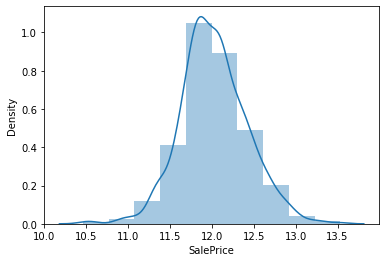

In [25]:
house_data['SalePrice']=np.log(house_data['SalePrice']) ## When I did not use the log transformation I could see a skewed data as it consists of huge range of values.
sns.distplot(house_data['SalePrice'],bins=10)
plt.show()

In [26]:
## The above plot shows a fairly normalised plot.

In [27]:
## Lets compare saleprice with few other variables.
## For the analysis I have shortlisted some variables which might have an impact on the saleprice.

<Figure size 720x432 with 0 Axes>

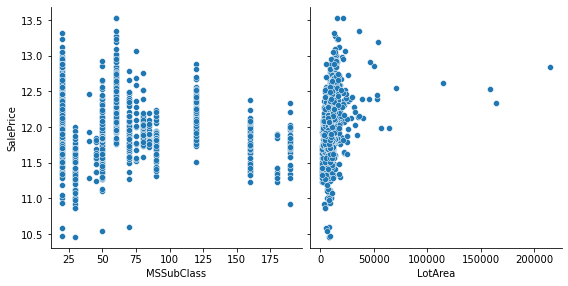

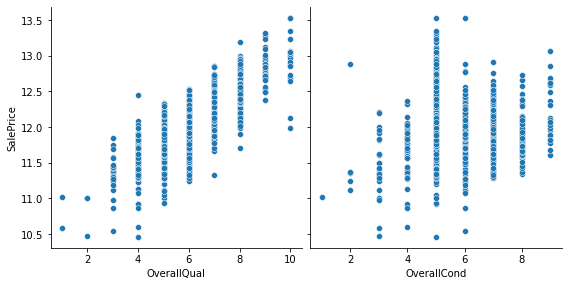

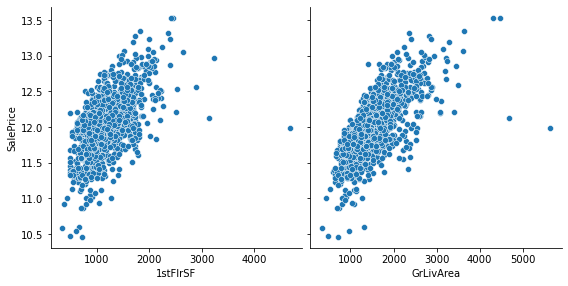

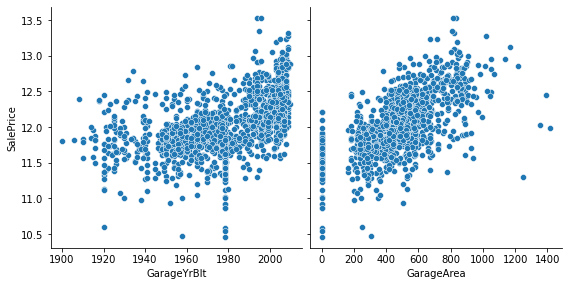

In [28]:
plt.figure(figsize=(10,6))
sns.pairplot(house_data, x_vars=['MSSubClass','LotArea'], y_vars='SalePrice',height=4)
sns.pairplot(house_data, x_vars=['OverallQual', 'OverallCond'], y_vars='SalePrice',height=4)
sns.pairplot(house_data, x_vars=['1stFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4)
sns.pairplot(house_data, x_vars=['GarageYrBlt', 'GarageArea'], y_vars='SalePrice',height=4)
plt.show()

In [29]:
## Lets try to convert the categorical variables to dummy. This helps to fit these values in to our regression model.

In [30]:
## Instead of getting each categorical variable one by one we can fetch them at once(object type) and then create dummies for them.
catg_val=house_data.select_dtypes(include=['object'])
catg_val.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [31]:
## Getting the dummy
catg_val=pd.get_dummies(catg_val,drop_first=True)

In [32]:
catg_val.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
house_data=pd.concat([house_data,catg_val],axis=1)

In [34]:
house_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [35]:
##Now lets drop those columns for which dummies have been created.
house_data.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],axis=1,inplace=True)

In [36]:
house_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
## Lets divide the data into X and y variables.

In [38]:
X = house_data.drop(['SalePrice'],axis=1)
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
y=house_data['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [40]:
## Lets perform a simple linear regression.

In [41]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [71]:
X_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,211,30,5604,5,6,1925,1950,0.0,468,0,...,0,0,0,0,1,0,0,0,1,0
318,319,60,9900,7,5,1993,1993,256.0,987,0,...,0,0,0,0,1,0,0,0,1,0
239,240,50,8741,6,4,1945,1950,0.0,94,0,...,0,0,0,0,1,0,0,0,1,0
986,987,50,5310,6,8,1910,2003,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1416,1417,190,11340,4,6,1885,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
lm=LinearRegression()## Instantiate

In [43]:
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
print(lm.intercept_)

7.545939082693771


In [45]:
print(lm.coef_)

[-4.67584021e-06 -2.76450955e-04  3.19855109e-06  3.90101030e-02
  3.62192454e-02  2.05259996e-03  1.16704477e-03  4.24563697e-06
  6.37045148e-05  4.98619530e-05  7.51138187e-06  1.21078171e-04
  9.65109489e-05  9.45895848e-05 -3.23660922e-05  1.58733420e-04
  2.31787433e-02  5.64101431e-04  6.82452551e-03  5.66686733e-03
  8.60915000e-03 -6.38535078e-02  2.35209911e-03  1.54622089e-02
 -7.45945458e-05  1.80687293e-02  1.14416832e-04  8.29807001e-05
  6.99406612e-05  9.45514807e-05  1.58880305e-04  1.60206626e-04
  7.67818472e-05  1.38759087e-06  1.87511314e-04 -3.28209412e-03
  4.39690751e-01  4.35570401e-01  4.32633758e-01  3.80414890e-01
  8.87480470e-02  1.22061964e-02  6.45607762e-03  5.27647782e-03
  2.55585431e-03 -1.46621387e-02  1.60181067e-02 -6.55084808e-02
  2.69405135e-02 -3.68786290e-02 -2.27543218e-02 -7.22710024e-03
  2.64738284e-02 -2.22026578e-01  6.23841731e-02 -3.51785110e-02
  8.03331880e-02  5.98526874e-02  9.93610674e-03  1.64673990e-01
 -3.28641886e-02  1.97433

In [46]:
y_train_pred=lm.predict(X_train)

In [47]:
y_pred_test=lm.predict(X_test)

In [48]:
metric=[]
r2_train=r2_score(y_train,y_train_pred)
print(r2_train)
metric.append(r2_train)

0.9579063996077203


In [49]:
metric=[]
r2_test=r2_score(y_test,y_pred_test)
print(r2_test)
metric.append(r2_test)

0.8649531716160864


# Ridge Regression

In [50]:
## We need to define some values of alpha to tune our model. Value too high(May lead to underfitting), 
## value too low(it might not handle overfitting)

In [51]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [52]:
ridge=Ridge()
folds=5
model_crv=GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_crv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_crv.best_params_)
print(model_crv.best_estimator_)

{'alpha': 50}
Ridge(alpha=50)


In [54]:
cv_results= pd.DataFrame(model_crv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009104,0.003861,0.003005,0.000598,0.0001,{'alpha': 0.0001},-0.089243,-0.094317,-0.094101,-0.099276,...,-0.091995,0.005489,10,-0.055317,-0.056108,-0.056119,-0.056950,-0.056210,-0.056141,0.000518
1,0.007092,0.001172,0.002796,0.000750,0.001,{'alpha': 0.001},-0.089202,-0.094293,-0.094070,-0.098847,...,-0.091865,0.005417,8,-0.055388,-0.056113,-0.056183,-0.056991,-0.056261,-0.056187,0.000509
2,0.006976,0.000629,0.002391,0.000489,0.01,{'alpha': 0.01},-0.089330,-0.094063,-0.095106,-0.095497,...,-0.091428,0.004692,3,-0.056518,-0.056163,-0.057022,-0.057711,-0.057170,-0.056917,0.000535
3,0.005581,0.000488,0.002392,0.000488,0.05,{'alpha': 0.05},-0.093314,-0.093379,-0.099048,-0.089380,...,-0.092483,0.004029,13,-0.060491,-0.056471,-0.060335,-0.061437,-0.061198,-0.059986,0.001806
4,0.007375,0.000797,0.002806,0.000407,0.1,{'alpha': 0.1},-0.095638,-0.093038,-0.101102,-0.087617,...,-0.093555,0.004624,17,-0.063061,-0.056868,-0.062597,-0.064334,-0.064093,-0.062191,0.002737


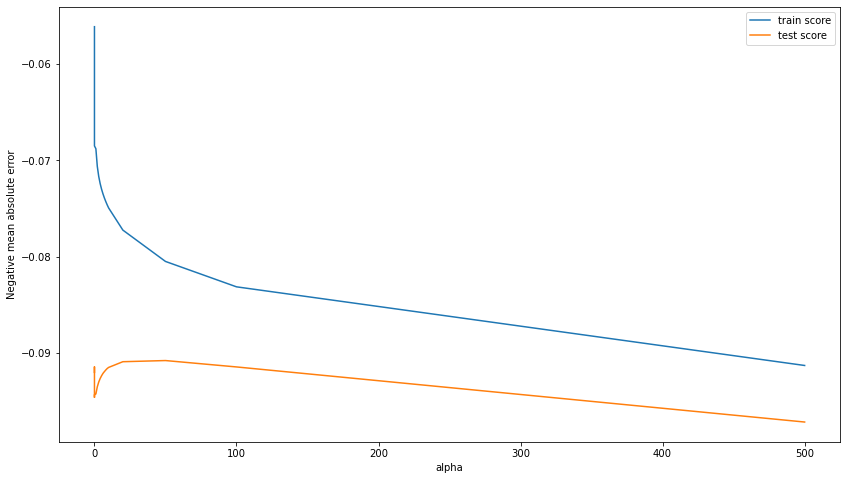

In [55]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [56]:
ridge=Ridge(alpha=50)
ridge.fit(X_train,y_train)
ridge.coef_

array([-9.56949099e-06, -5.72780383e-04,  1.60572551e-06,  6.48201877e-02,
        3.86164692e-02,  1.85382738e-03,  1.34035889e-03,  4.06606108e-07,
       -3.38362129e-06,  3.33042456e-05, -1.33318404e-06,  2.85874403e-05,
        6.25413312e-05,  6.67872526e-05,  2.49773825e-05,  1.54305966e-04,
        4.57047795e-02,  5.24099191e-03,  2.09783238e-02,  1.50878070e-02,
        1.03436284e-02, -1.47511886e-02,  9.51586195e-03,  3.37446689e-02,
       -3.46462048e-04,  4.01231195e-02,  8.57905189e-05,  1.19633030e-04,
       -4.83763747e-05,  1.45991030e-04,  2.32729656e-04,  2.46829878e-04,
       -6.74356707e-04, -5.61669313e-06, -6.17446533e-04, -7.26884848e-03,
        2.31659420e-02,  7.26742987e-03,  3.23623401e-02, -2.01627935e-02,
        9.74196294e-03,  1.08447441e-02, -2.04846834e-02,  6.43482513e-05,
        1.43604377e-02,  1.55279039e-02,  1.86320698e-02, -2.85394854e-03,
        2.55647549e-02, -1.07998969e-02, -1.27140718e-03, -2.00251889e-03,
        1.72159192e-02, -

In [57]:
ridge_parameters = list(sorted(ridge.coef_))
ridge_parameters.insert(0, ridge.intercept_)
ridge_parameters = [round(x, 3) for x in ridge_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
cols=cols.sort_values(ascending=False)
list(zip(cols, ridge_parameters))

[('constant', 19.56),
 ('YrSold', -0.049),
 ('YearRemodAdd', -0.033),
 ('YearBuilt', -0.031),
 ('WoodDeckSF', -0.024),
 ('Utilities_NoSeWa', -0.023),
 ('TotalBsmtSF', -0.022),
 ('TotRmsAbvGrd', -0.02),
 ('Street_Pave', -0.02),
 ('ScreenPorch', -0.02),
 ('SaleType_WD', -0.019),
 ('SaleType_Oth', -0.018),
 ('SaleType_New', -0.018),
 ('SaleType_ConLw', -0.018),
 ('SaleType_ConLI', -0.017),
 ('SaleType_ConLD', -0.017),
 ('SaleType_Con', -0.016),
 ('SaleType_CWD', -0.016),
 ('SaleCondition_Partial', -0.015),
 ('SaleCondition_Normal', -0.015),
 ('SaleCondition_Family', -0.014),
 ('SaleCondition_Alloca', -0.014),
 ('SaleCondition_AdjLand', -0.014),
 ('RoofStyle_Shed', -0.013),
 ('RoofStyle_Mansard', -0.013),
 ('RoofStyle_Hip', -0.013),
 ('RoofStyle_Gambrel', -0.013),
 ('RoofStyle_Gable', -0.012),
 ('RoofMatl_WdShngl', -0.012),
 ('RoofMatl_WdShake', -0.011),
 ('RoofMatl_Tar&Grv', -0.011),
 ('RoofMatl_Roll', -0.011),
 ('RoofMatl_Metal', -0.011),
 ('RoofMatl_Membran', -0.011),
 ('RoofMatl_CompSh

In [58]:
y_train_pred=ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))
mean_squared_error(y_test, ridge.predict(X_test))

0.9032506577973932
0.8820221045023403


0.019412096672914325

In [59]:
model_param=list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
model_param=[round(x,2) for x in  model_param]
colum=X.columns
colum=colum.insert(0,"constant")
list(zip(model_param,colum))

[(19.56, 'constant'),
 (-0.0, 'Id'),
 (-0.0, 'MSSubClass'),
 (0.0, 'LotArea'),
 (0.06, 'OverallQual'),
 (0.04, 'OverallCond'),
 (0.0, 'YearBuilt'),
 (0.0, 'YearRemodAdd'),
 (0.0, 'MasVnrArea'),
 (-0.0, 'BsmtFinSF1'),
 (0.0, 'BsmtFinSF2'),
 (-0.0, 'BsmtUnfSF'),
 (0.0, 'TotalBsmtSF'),
 (0.0, '1stFlrSF'),
 (0.0, '2ndFlrSF'),
 (0.0, 'LowQualFinSF'),
 (0.0, 'GrLivArea'),
 (0.05, 'BsmtFullBath'),
 (0.01, 'BsmtHalfBath'),
 (0.02, 'FullBath'),
 (0.02, 'HalfBath'),
 (0.01, 'BedroomAbvGr'),
 (-0.01, 'KitchenAbvGr'),
 (0.01, 'TotRmsAbvGrd'),
 (0.03, 'Fireplaces'),
 (-0.0, 'GarageYrBlt'),
 (0.04, 'GarageCars'),
 (0.0, 'GarageArea'),
 (0.0, 'WoodDeckSF'),
 (-0.0, 'OpenPorchSF'),
 (0.0, 'EnclosedPorch'),
 (0.0, '3SsnPorch'),
 (0.0, 'ScreenPorch'),
 (-0.0, 'PoolArea'),
 (-0.0, 'MiscVal'),
 (-0.0, 'MoSold'),
 (-0.01, 'YrSold'),
 (0.02, 'MSZoning_FV'),
 (0.01, 'MSZoning_RH'),
 (0.03, 'MSZoning_RL'),
 (-0.02, 'MSZoning_RM'),
 (0.01, 'Street_Pave'),
 (0.01, 'LotShape_IR2'),
 (-0.02, 'LotShape_IR3'),
 (0.

# Lasso Regression

In [60]:
lasso=Lasso()
folds=5
model_crv=GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_crv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
print(model_crv.best_params_)
print(model_crv.best_estimator_)

{'alpha': 0.0001}
Lasso(alpha=0.0001)


In [62]:
cv_results= pd.DataFrame(model_crv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045564,0.010001,0.002792,0.000399,0.0001,{'alpha': 0.0001},-0.087548,-0.091705,-0.096252,-0.084947,...,-0.087974,0.005745,1,-0.064348,-0.059204,-0.063176,-0.063621,-0.065037,-0.063077,0.002038
1,0.013356,0.001351,0.002192,0.000399,0.001,{'alpha': 0.001},-0.090133,-0.095357,-0.101262,-0.080490,...,-0.090778,0.007130,2,-0.081876,-0.071887,-0.076824,-0.083186,-0.082078,-0.079170,0.004253
2,0.008571,0.000797,0.002791,0.000399,0.01,{'alpha': 0.01},-0.098605,-0.106253,-0.106588,-0.089931,...,-0.099220,0.006490,3,-0.098338,-0.088125,-0.093320,-0.099613,-0.097588,-0.095397,0.004205
3,0.031761,0.007717,0.002591,0.000798,0.05,{'alpha': 0.05},-0.105412,-0.119464,-0.116970,-0.103257,...,-0.109645,0.007090,4,-0.107433,-0.100355,-0.103526,-0.108601,-0.107802,-0.105543,0.003131
4,0.026380,0.003721,0.002849,0.000443,0.1,{'alpha': 0.1},-0.112138,-0.126375,-0.124662,-0.112477,...,-0.117607,0.006483,8,-0.116879,-0.105719,-0.111086,-0.116773,-0.117158,-0.113523,0.004514


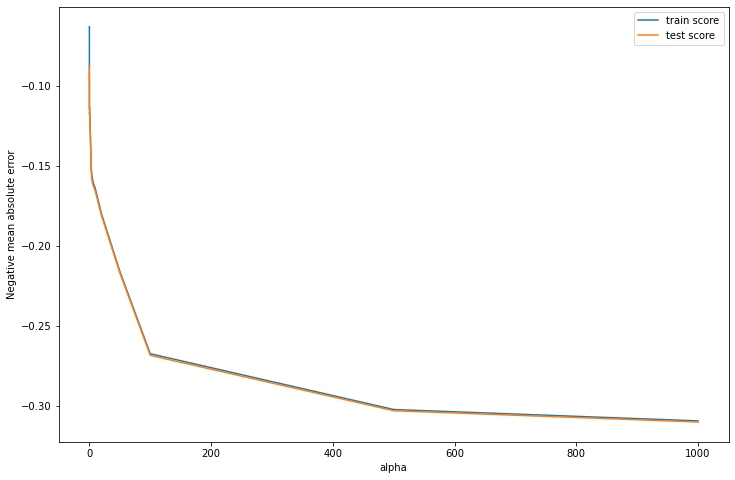

In [63]:
cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(12,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative mean absolute error')
plt.legend(['train score','test score'],loc='upper right')
plt.show()

In [69]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
lasso.coef_


array([-9.00019229e-06, -5.00616780e-04,  1.78527653e-06,  4.74997329e-02,
        3.43641430e-02,  1.53305685e-03,  1.20833446e-03,  1.21313442e-06,
        4.49407030e-05,  6.82128225e-05,  3.16743330e-05,  1.89729607e-05,
        2.24689806e-04,  2.27321900e-04,  1.40154062e-04,  2.74241310e-05,
        4.20972419e-02,  5.57048016e-03,  1.77334970e-02,  1.01543286e-02,
        9.00948398e-03, -4.34917420e-02,  3.97516325e-03,  2.02700420e-02,
       -2.01651509e-04,  4.57016533e-02,  3.59671245e-05,  8.64526887e-05,
        7.25381125e-05,  1.18737440e-04,  1.93040683e-04,  1.72831006e-04,
       -2.86457157e-04, -3.65212358e-06, -3.05059755e-04, -3.84565672e-03,
        3.23301904e-01,  3.29630224e-01,  3.34868997e-01,  2.88369434e-01,
        1.88326867e-02,  7.16603996e-03, -6.79491201e-02,  4.81429750e-03,
        2.59851088e-02,  4.25921811e-02,  3.52869336e-02, -1.41752242e-02,
        4.27061049e-02, -3.58310662e-02, -0.00000000e+00, -4.10391614e-03,
        1.46769191e-02, -

In [70]:
lasso_parameters = list(sorted(lasso.coef_))
lasso_parameters.insert(0, lasso.intercept_)
lasso_parameters = [round(x, 3) for x in lasso_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
cols=cols.sort_values(ascending=False)
list(zip(cols, lasso_parameters))

[('constant', 12.003),
 ('YrSold', -1.317),
 ('YearRemodAdd', -0.176),
 ('YearBuilt', -0.142),
 ('WoodDeckSF', -0.141),
 ('Utilities_NoSeWa', -0.139),
 ('TotalBsmtSF', -0.069),
 ('TotRmsAbvGrd', -0.068),
 ('Street_Pave', -0.065),
 ('ScreenPorch', -0.061),
 ('SaleType_WD', -0.059),
 ('SaleType_Oth', -0.059),
 ('SaleType_New', -0.055),
 ('SaleType_ConLw', -0.054),
 ('SaleType_ConLI', -0.053),
 ('SaleType_ConLD', -0.049),
 ('SaleType_Con', -0.048),
 ('SaleType_CWD', -0.047),
 ('SaleCondition_Partial', -0.044),
 ('SaleCondition_Normal', -0.044),
 ('SaleCondition_Family', -0.043),
 ('SaleCondition_Alloca', -0.04),
 ('SaleCondition_AdjLand', -0.037),
 ('RoofStyle_Shed', -0.037),
 ('RoofStyle_Mansard', -0.036),
 ('RoofStyle_Hip', -0.035),
 ('RoofStyle_Gambrel', -0.031),
 ('RoofStyle_Gable', -0.03),
 ('RoofMatl_WdShngl', -0.026),
 ('RoofMatl_WdShake', -0.025),
 ('RoofMatl_Tar&Grv', -0.024),
 ('RoofMatl_Roll', -0.023),
 ('RoofMatl_Metal', -0.021),
 ('RoofMatl_Membran', -0.021),
 ('RoofMatl_Comp

In [66]:
y_train_pred=lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test,y_pred=y_test_pred))
mean_squared_error(y_test, lasso.predict(X_test))

0.9321578186827268
0.8751479428967575


0.020543172024529287

In [67]:
model_param=list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
model_param=[round(x,2) for x in  model_param]
colum=X.columns
colum=colum.insert(0,"constant")
list(zip(model_param,colum))

[(15.66, 'constant'),
 (-0.0, 'Id'),
 (-0.0, 'MSSubClass'),
 (0.0, 'LotArea'),
 (0.05, 'OverallQual'),
 (0.03, 'OverallCond'),
 (0.0, 'YearBuilt'),
 (0.0, 'YearRemodAdd'),
 (-0.0, 'MasVnrArea'),
 (-0.0, 'BsmtFinSF1'),
 (0.0, 'BsmtFinSF2'),
 (0.0, 'BsmtUnfSF'),
 (0.0, 'TotalBsmtSF'),
 (0.0, '1stFlrSF'),
 (0.0, '2ndFlrSF'),
 (0.0, 'LowQualFinSF'),
 (0.0, 'GrLivArea'),
 (0.05, 'BsmtFullBath'),
 (0.01, 'BsmtHalfBath'),
 (0.03, 'FullBath'),
 (0.01, 'HalfBath'),
 (0.01, 'BedroomAbvGr'),
 (-0.03, 'KitchenAbvGr'),
 (0.0, 'TotRmsAbvGrd'),
 (0.02, 'Fireplaces'),
 (-0.0, 'GarageYrBlt'),
 (0.06, 'GarageCars'),
 (-0.0, 'GarageArea'),
 (0.0, 'WoodDeckSF'),
 (0.0, 'OpenPorchSF'),
 (0.0, 'EnclosedPorch'),
 (0.0, '3SsnPorch'),
 (0.0, 'ScreenPorch'),
 (-0.0, 'PoolArea'),
 (-0.0, 'MiscVal'),
 (-0.0, 'MoSold'),
 (-0.0, 'YrSold'),
 (0.24, 'MSZoning_FV'),
 (0.24, 'MSZoning_RH'),
 (0.25, 'MSZoning_RL'),
 (0.21, 'MSZoning_RM'),
 (0.0, 'Street_Pave'),
 (0.01, 'LotShape_IR2'),
 (-0.1, 'LotShape_IR3'),
 (0.01, '

# Conclusion

In [68]:
## The optimal value of alpha in ridge and lasso are as below:
## Ridge=50
## Lasso=0.0001

## MSE
## Ridge=0.019
## Lasso=0.020

## The MSE for lasso id slightly higher than Ridge.
